In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime
%matplotlib inline
import matplotlib
import matplotlib.ticker as tick
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

places_df = pd.read_csv('data/clean_mobility_data.csv')


In [11]:
us_df = places_df[(places_df['sub_region_1'].isnull()) & (places_df['sub_region_2'].isnull())]

In [12]:
date = us_df['date']
date

0         2020-02-15
1         2020-02-16
2         2020-02-17
3         2020-02-18
4         2020-02-19
             ...    
812175    2021-04-21
812176    2021-04-22
812177    2021-04-23
812178    2021-04-24
812179    2021-04-25
Name: date, Length: 436, dtype: object

In [13]:
date2 = pd.to_datetime(date, format="%Y/%m/%d")
date2

0        2020-02-15
1        2020-02-16
2        2020-02-17
3        2020-02-18
4        2020-02-19
            ...    
812175   2021-04-21
812176   2021-04-22
812177   2021-04-23
812178   2021-04-24
812179   2021-04-25
Name: date, Length: 436, dtype: datetime64[ns]

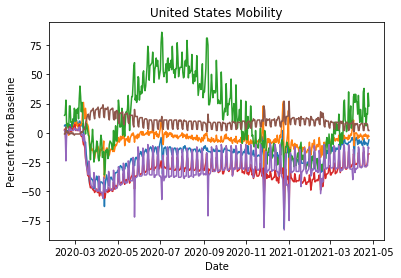

In [14]:
categories =['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 
             'residential_percent_change_from_baseline']
for category in categories:
        plt.plot(date2, us_df[category], label=category)

        
def x_axis_dates(ax=None, fig=None):
   
    if ax is None: ax = plt.gca()
    if fig is None: fig = plt.gcf()
    loc = mdates.AutoDateLocator()
    fmt = mdates.AutoDateFormatter(loc)
    try:
        ax.xaxis.set_major_locator(loc)
        ax.xaxis.set_major_formatter(fmt)
    except AttributeError:
        for a in ax:
            # Fresh locators/formatters are needed for each instance
            loc = mdates.AutoDateLocator()
            fmt = mdates.AutoDateFormatter(loc)
            a.xaxis.set_major_locator(loc)
            a.xaxis.set_major_formatter(fmt)
    fig.autofmt_xdate()
    
    


plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Percent from Baseline')
# Set a title of the current axes.
plt.title('United States Mobility')
# show a legend on the plot
plt.legend
x_axis_dates



plt.show()